In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlpack

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [12]:
loanData = pd.read_csv("LoanDefault.csv")
loanData.drop("Index", axis=1, inplace=True)

In [13]:
loanData.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [14]:
# Examine the shape of the dataframe.
print(f"# of rows: {loanData.shape[0]}")
print(f"# of cols: {loanData.shape[1]}")

# of rows: 10000
# of cols: 4


In [15]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [16]:
## Check the percentage of missing values in each feature befor imputation
(loanData.isnull().sum() / len(loanData)) * 100

Employed         0.0
Bank Balance     0.0
Annual Salary    0.0
Defaulted?       0.0
dtype: float64

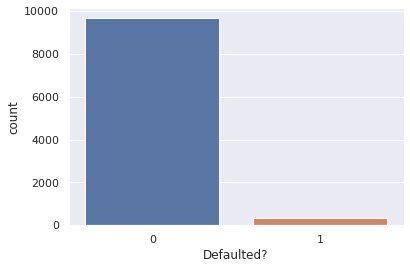

In [18]:
# Visualize the distibution of target classes.
sns.countplot(x="Defaulted?", data=loanData)
plt.show()

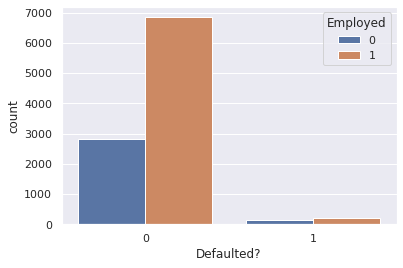

In [19]:
# Visualize the distibution of target classes.
sns.countplot(x="Defaulted?", hue="Employed", data=loanData)
plt.show()

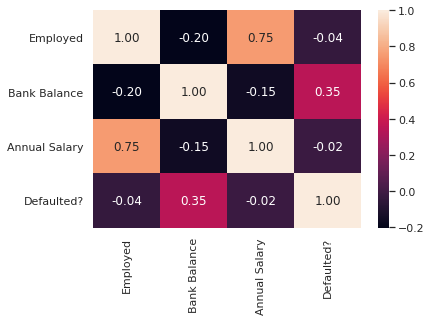

In [20]:
sns.heatmap(loanData.corr(), annot=True, fmt=".2f")
plt.show()

In [22]:
featureNames = ["Employed", "Bank Balance", "Annual Salary"]

In [25]:
features = loanData[featureNames]
target = loanData["Defaulted?"]

In [26]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [28]:
def StandardScaler(data):
    for col in range(data.shape[1]):
        data[:, col] = (data[:, col] - data[:,col].mean()) / (data[:,col].std())
    return data

In [29]:
# Normalize Features.
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [30]:
# Create and train Random Forest model with 100 trees.
output = mlpack.decision_tree(training=Xtrain, labels=ytrain, print_training_accuracy=True)

In [31]:
rf = output["output_model"]

In [32]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.decision_tree(input_model=rf, test=Xtest)

In [33]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

In [35]:
from sklearn.metrics import *

In [36]:
def plot_rocAUC(fper, tper):
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

Accuracy: 0.9704
ROC AUC: 0.6100206611570249
Cohen's Kappa: 0.31532198371576614
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2420
           1       0.60      0.23      0.33        80

    accuracy                           0.97      2500
   macro avg       0.79      0.61      0.66      2500
weighted avg       0.96      0.97      0.96      2500



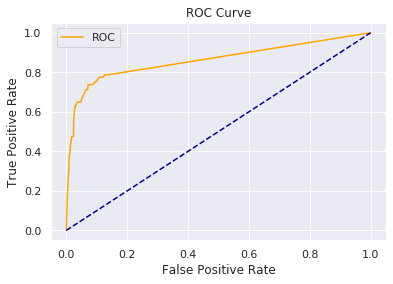

In [37]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)

In [38]:
def Resample(data, replace, n_samples, random_state = 123):
    np.random.seed(random_state)
    indices = data.index
    random_sampled_indices = np.random.choice(indices,
                                              size=n_samples,
                                              replace=replace)
    return data.loc[random_sampled_indices]

In [41]:
negClass = loanData[loanData["Defaulted?"] == 0]
posClass = loanData[loanData["Defaulted?"] == 1]
posOverSampled = Resample(posClass, replace=True, n_samples=len(negClass))
overSampled = pd.concat([negClass, posOverSampled])

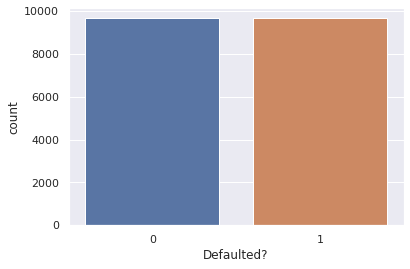

In [43]:
# Visualize the distibution of target classes.
sns.countplot(x="Defaulted?", data=overSampled)
plt.show()

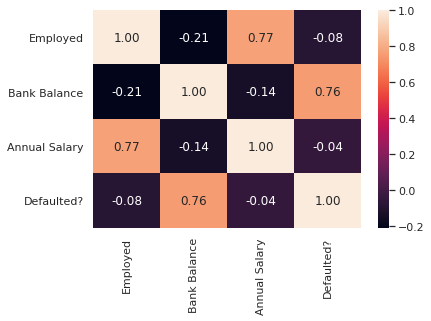

In [44]:
sns.heatmap(overSampled.corr(), annot=True, fmt=".2f")
plt.show()

In [45]:
featureNames = ["Employed", "Bank Balance", "Annual Salary"]

In [46]:
features = loanData[featureNames]
target = loanData["Defaulted?"]

In [47]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [48]:
# Normalize Features.
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [49]:
# Create and train Random Forest model with 100 trees.
output = mlpack.decision_tree(training=Xtrain, labels=ytrain, print_training_accuracy=True)

In [50]:
rf = output["output_model"]

In [51]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.decision_tree(input_model=rf, test=Xtest)

In [52]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Accuracy: 0.9756
ROC AUC: 0.7302532168420833
Cohen's Kappa: 0.5359833501697845
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2421
           1       0.66      0.47      0.55        79

    accuracy                           0.98      2500
   macro avg       0.82      0.73      0.77      2500
weighted avg       0.97      0.98      0.97      2500



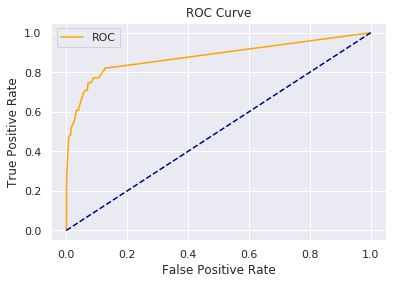

In [53]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)

In [54]:
smoteData = loanData.copy()

In [58]:
featureNames = ["Employed", "Bank Balance", "Annual Salary", "Defaulted?"]
features = loanData[featureNames]

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
os = SMOTE()
features, targets = os.fit_resample(features.iloc[:, :-1], features.iloc[:,-1])

In [61]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = targets.iloc[train_idxs[:split]].values
ytrain = targets.iloc[train_idxs[split:]].values

In [62]:
# Normalize Features.
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [63]:
# Create and train Random Forest model with 100 trees.
output = mlpack.decision_tree(training=Xtrain, labels=ytrain, print_training_accuracy=True)

In [64]:
rf = output["output_model"]

In [65]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.decision_tree(input_model=rf, test=Xtest)

In [66]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Accuracy: 0.8975791433891993
ROC AUC: 0.8973284690689453
Cohen's Kappa: 0.7949977544600383
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2371
           1       0.89      0.91      0.90      2462

    accuracy                           0.90      4833
   macro avg       0.90      0.90      0.90      4833
weighted avg       0.90      0.90      0.90      4833



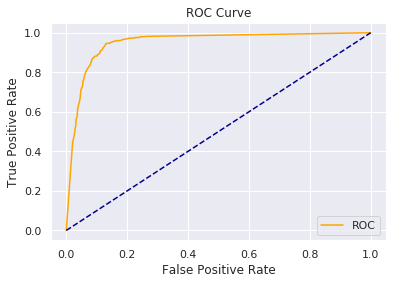

In [67]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)